### **Iris Dataset for regression**

**Abstract:** 
<p>This is perhaps the best known database to be found in the pattern recognition literature. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. </p>

**Attribute Information:**

|Attribute | Explanation                 |
|  :----   | :----                       |
|Class     | Class of flower (Setosa, Versicolour, Virginica) | 
|sepallength.    | sepal length in cm    | 
|sepalwidth.     | sepal width in cm     | 
|petallength.    | petal length in cm    | 
|petalwidth.     | petal width in cm     | 

**Data source:**
<p>Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.</p>

In [312]:
# Environment Preparation
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

1.15.2


**Data Pre-processing:**

*   Data Cleaning
*   Data Split
*   Data Normalisation

In [313]:
import pandas as pd
import numpy as np
import datetime
import time
import matplotlib.pyplot as plt
import math
import random
import seaborn as sns
from IPython.display import display, Image
%matplotlib inline

# read data from csv file and process X, y
def data_loader(data_path):
		# load raw data
    data = pd.read_csv(data_path)

    features = data.columns[0:4]
    labels = data.columns[4]

    # Z-Score normalisation
    for feature in features:
        data[feature] = (data[feature] - data[feature].mean())/data[feature].std()

    X = data[features].astype(np.float32)
    y = pd.get_dummies(data[labels]).astype(np.float32)# One Hot Encode as a dataframe

    return X, y

# split the data into train, val and test set
from sklearn.model_selection import train_test_split
def train_test_val_split(data, ratio_train, ratio_test, ratio_val):
		X_train, X_middle, y_train, y_middle = train_test_split(data[0], data[1], train_size=ratio_train, test_size=ratio_test + ratio_val, shuffle=True)
		ratio = ratio_val/(1-ratio_train)
		X_val, X_test, y_val, y_test = train_test_split(X_middle, y_middle, train_size=ratio, shuffle=True)
		return (X_train, y_train),(X_val, y_val),(X_test, y_test)

data_path = "/content/drive/My Drive/Colab Notebooks/ML_COMP3009/CW1/classification/iris.csv"
X, y = data_loader(data_path)

(X_train, y_train),(X_val, y_val),(X_test, y_test) = train_test_val_split((X.values, y.values), 0.6, 0.2, 0.2)

X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape

((90, 4), (90, 3), (30, 4), (30, 3), (30, 4), (30, 3))

Artificial Neural Network Configuration

In [314]:
#Network parameters
n_input = 4 
n_hidden1, n_hidden2 = 12, 6
n_output = 3
#Learning parameters 
learning_rate = 0.001
number_epochs = 1000
batch_size = 32

#Defining the input and the output
X_p = tf.placeholder("float", [None, n_input], name='X_p') 
Y_p = tf.placeholder("float", [None, n_output], name='Y_p')

# forward
def multilayer_perceptron(input_d):
    #DEFINING WEIGHTS AND BIASES
    b1 = tf.Variable(tf.random_normal([n_hidden1])) #Biases first hidden layer
    b2 = tf.Variable(tf.random_normal([n_hidden2])) #Biases second hidden layer
    b3 = tf.Variable(tf.random_normal([n_output]))  #Biases output layer
    
    w1 = tf.Variable(tf.random_normal([n_input, n_hidden1]))   #Weights connecting input layer with first hidden layer
    w2 = tf.Variable(tf.random_normal([n_hidden1, n_hidden2])) #Weights connecting first hidden layer with second hidden layer 
    w3 = tf.Variable(tf.random_normal([n_hidden2, n_output]))

    layer_1 = tf.nn.leaky_relu(tf.add(tf.matmul(input_d, w1), b1), alpha=0.01) #Task of neurons of first hidden layer
    layer_2 = tf.nn.leaky_relu(tf.add(tf.matmul(layer_1, w2), b2), alpha=0.01) #Task of neurons of second hidden layer
    out_layer = tf.add(tf.matmul(layer_2, w3),b3)            #Task of neurons of output layer
    
    return out_layer

# create model
neural_network = multilayer_perceptron(X_p)

# define loss function
loss_func = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_network,labels=Y_p))

# define eval function
prediction = tf.nn.softmax(neural_network)
correct_prediction = tf.equal(tf.argmax(prediction,1),tf.argmax(Y_p,1)) 
accuracy_func = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# define optimizer
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss_func)

# initializaing variables
init = tf.global_variables_initializer()


Training

Epoch: 100, Training loss: 2.696836, Validation loss: 4.190439, 
Epoch: 200, Training loss: 1.1435357, Validation loss: 1.5999987, 
Epoch: 300, Training loss: 0.6236943, Validation loss: 1.2829617, 
Epoch: 400, Training loss: 0.39020613, Validation loss: 1.1154782, 
Epoch: 500, Training loss: 0.30811545, Validation loss: 0.9674919, 
Epoch: 600, Training loss: 0.2191035, Validation loss: 0.81956124, 
Epoch: 700, Training loss: 0.13988417, Validation loss: 0.6837069, 
Epoch: 800, Training loss: 0.09594125, Validation loss: 0.5832755, 
Epoch: 900, Training loss: 0.121910475, Validation loss: 0.50507236, 
Epoch: 1000, Training loss: 0.081597015, Validation loss: 0.45870504, 
The totoal training time is: 2.346014000000025
Accuracy: 0.93333334


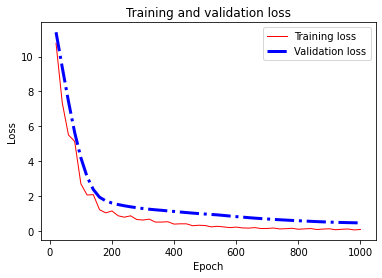

<Figure size 432x288 with 0 Axes>

In [315]:
train_losses = []
val_losses = []
select_epoch_from = 0
epochs = []
batch_iteration = int(len(X_train) / batch_size) + 1
with tf.Session() as sess: 
    sess.run(init)
    start_time = time.clock() 
    #Training epoch 
    for epoch in range(1,number_epochs+1):
        n = epoch % batch_iteration
        s = 0 + batch_size * n
        if n == 0:
           e = len(X_train)
        else:
           e = batch_size + batch_size * n
        
        batch_X = np.array(X_train[s:e])
        batch_y = np.array(y_train[s:e])

      
        _, train_loss = sess.run([optimizer, loss_func], feed_dict={X_p: batch_X, Y_p: batch_y})

        val_loss = loss_func.eval({X_p: X_val, Y_p: y_val})

        if epoch >= select_epoch_from and epoch % 20 == 0:
            train_losses.append(train_loss)
            val_losses.append(val_loss)
            epochs.append(epoch)

        #Display the epoch
        if epoch % 100 == 0:
            print("Epoch: %d, "
                  "Training loss: %s, "
                  "Validation loss: %s, " % (epoch, train_loss, val_loss))
    end_time = time.clock()
    print("The totoal training time is: " + str(end_time-start_time))

    plt.plot(epochs, train_losses, 'r', label='Training loss', linewidth=1, linestyle='-')
    plt.plot(epochs, val_losses, 'b', label='Validation loss', linewidth=3, linestyle='-.')
    plt.xlabel('Epoch') 
    plt.ylabel('Loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.figure()
    
    # Test model 
    # output = prediction.eval({X_p: X_test}) 
    # print(tf.argmax(output,1))

    # plot prediction and labels
    # plt.scatter(y_test[0:500], output[0:500], linestyle = "dotted")
    # # pyplot.scatter(y_test, output, linestyle = "dotted")
    # plt.plot([1,2,3,4,5,6,7], [1,2,3,4,5,6,7], 'r')
    # plt.xlabel('Real log(PM2.5 + 1)') 
    # plt.ylabel('Predicted log(PM2.5 + 1)')
    # plt.title('Predictions and Real values')
    # plt.show()
    # plt.plot( tf.argmax(y_test,1)[0:500], 'ro', tf.argmax(output,1)[0:500], 'bo') 
    # plt.ylabel('Classes')
    # plt.xlabel('Instance')
    # plt.show()

    # final accuracy
    accuracy = sess.run(accuracy_func,feed_dict={X_p:X_test,Y_p:y_test})
    print("Accuracy: " + str(accuracy))